In [19]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
#import country_converter as coco
#from wordcloud import WordCloud

data = "Dasts Science Salaries.csv"
data = pd.read_csv(data)

In [20]:
data.head(10)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
5,5,2020,EN,FT,Data Analyst,72000,USD,72000,US,100,US,L
6,6,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,100,US,S
7,7,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
8,8,2020,MI,FT,Business Data Analyst,135000,USD,135000,US,100,US,L
9,9,2020,SE,FT,Lead Data Engineer,125000,USD,125000,NZ,50,NZ,S


In [21]:
data.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [22]:
data.info

<bound method DataFrame.info of      Unnamed: 0  work_year experience_level employment_type  \
0             0       2020               MI              FT   
1             1       2020               SE              FT   
2             2       2020               SE              FT   
3             3       2020               MI              FT   
4             4       2020               SE              FT   
..          ...        ...              ...             ...   
602         602       2022               SE              FT   
603         603       2022               SE              FT   
604         604       2022               SE              FT   
605         605       2022               SE              FT   
606         606       2022               MI              FT   

                      job_title  salary salary_currency  salary_in_usd  \
0                Data Scientist   70000             EUR          79833   
1    Machine Learning Scientist  260000             USD        

In [23]:
data.shape

(607, 12)

## Data Processing

In [25]:
data.isnull().sum()

Unnamed: 0            0
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

Data contains no null values

In [31]:
data.drop_duplicates(['Unnamed: 0'], inplace=True)

The data is clean there are no duplicates in first column and null values

In [35]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

## Analyse Data

[2020 2021 2022]
2022    318
2021    217
2020     72
Name: work_year, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


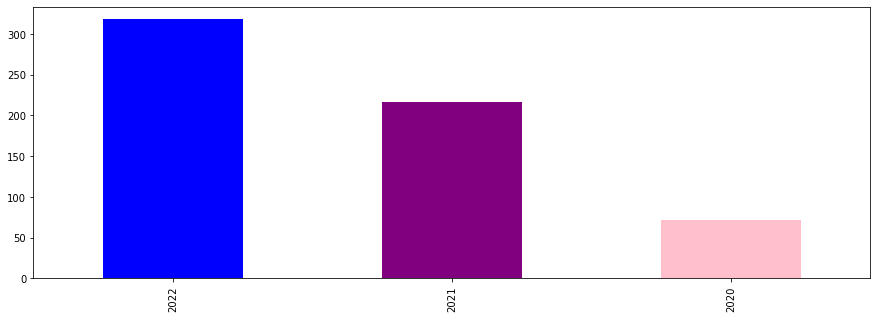

In [44]:
print(data['work_year'].unique())
print(data['work_year'].value_counts())
print(data['work_year'].value_counts().plot(kind='bar', color=['blue', 'purple', 'pink'], figsize=(15,5)))

All the data are around the 3 years i.e., 2022,2021 and 2020. maximum data is avaliable of 2022 year

In [46]:
data['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

In [48]:
data['experience_level'].value_counts()

SE    280
MI    213
EN     88
EX     26
Name: experience_level, dtype: int64

<AxesSubplot:ylabel='Experience Level'>

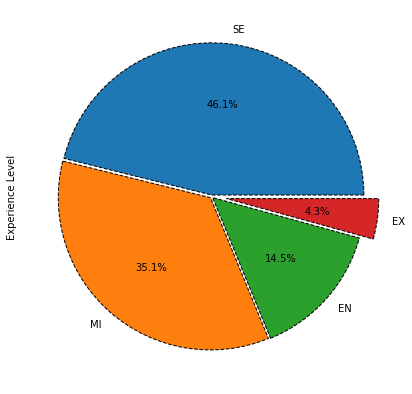

In [77]:
data['experience_level'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(7,7), wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'dashed', 'antialiased': True},
                                             explode=(0.01,0.01,0.01,0.1), ylabel='Experience Level')

According to experience level there are 4 types of employees, that are Seniors who having intermidiate knowledge,Juniors having mid-level knowledge , entry level employees which are newbie and experts who having executive level. The number of Seniors are higher than others employees

['FT' 'CT' 'PT' 'FL']
FT    588
PT     10
CT      5
FL      4
Name: employment_type, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


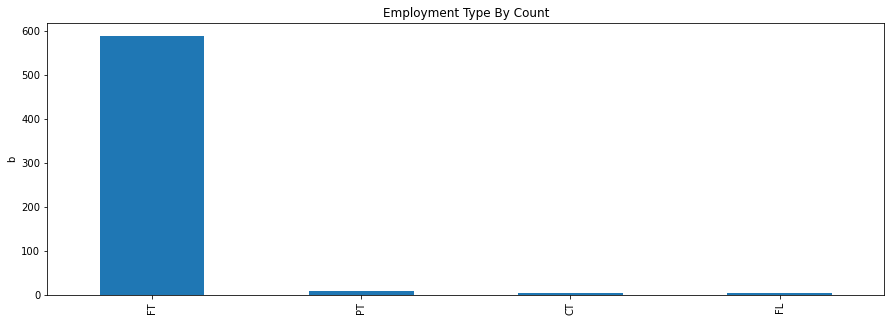

In [75]:
print(data['employment_type'].unique())
print(data['employment_type'].value_counts())
print(data['employment_type'].value_counts().plot(kind='bar', title='Employment Type By Count', figsize=(15,5), ylabel=''))

Most employees work as full time

Approx 98% employees are working as full time, 2 employees work as part time and one employees work as Freelancer and contractual basis.

607
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine Learning Scientist'
 'Data Analytics Manager' 'Head of Data Science' 'Data Specialist'
 'Data Architect' 'Finance Data 

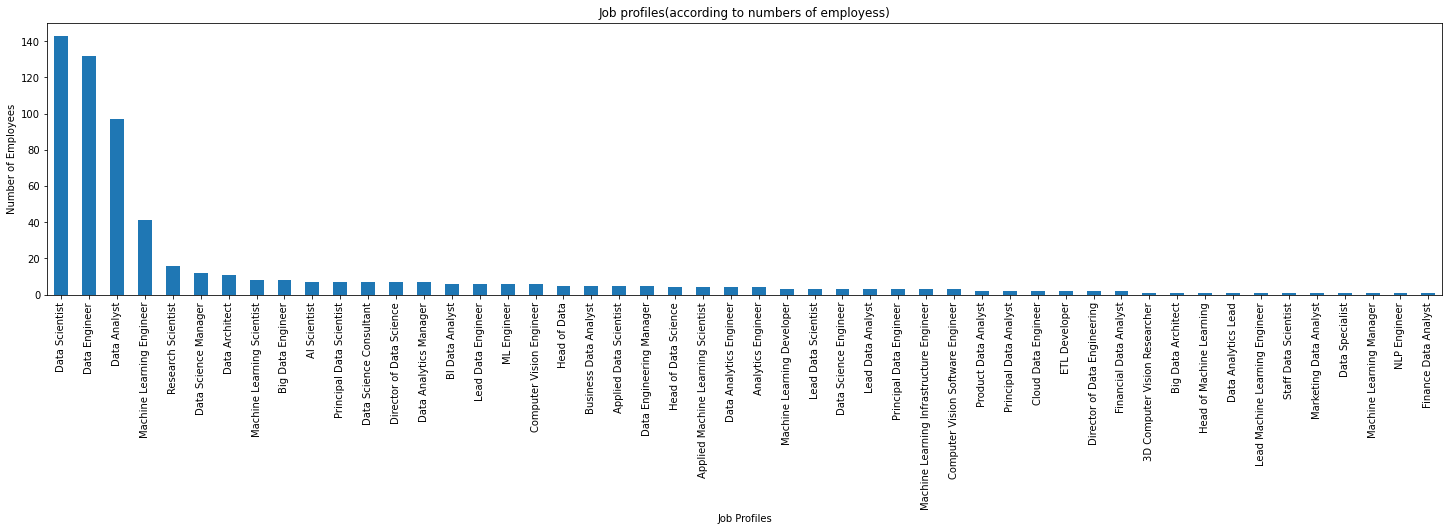

In [83]:
print(data['job_title'].count())
print(data['job_title'].unique())
print(data['job_title'].nunique())
print(data['job_title'].value_counts())
print(data['job_title'].value_counts().plot(kind='bar', title='Job profiles(according to numbers of employess)', xlabel='Job Profiles', ylabel='Number of Employees', figsize=(25,5)))

AxesSubplot(0.125,0.125;0.775x0.755)


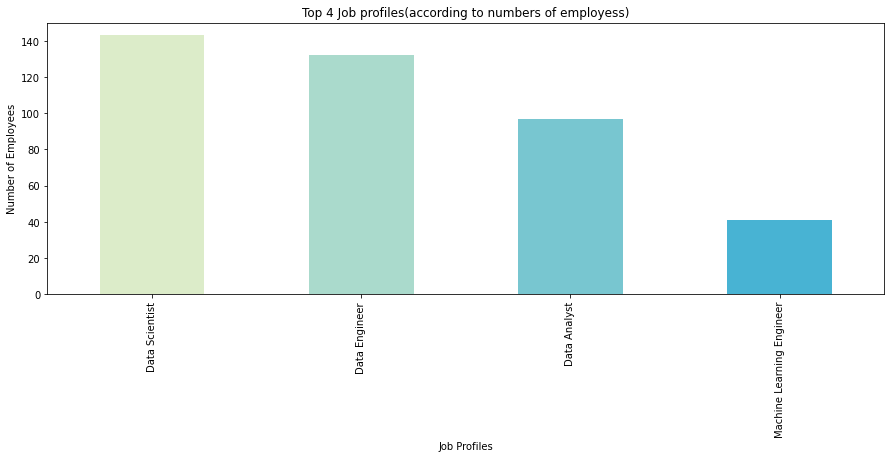

In [88]:
print(data['job_title'].value_counts()[:4].plot(kind='bar',
title='Top 4 Job profiles(according to numbers of employess)', xlabel='Job Profiles', ylabel='Number of Employees', figsize=(15,5),
color=['#dcecc9', '#aadacc', '#78c6d0', '#48b3d3', '#3e94c0', '#3474ac', '#2a5599', '#203686']))

There are total 607 employees who have the 50 different work profile. Mostly employess having the data scientist and data engineer's profile.

['EUR' 'USD' 'GBP' 'HUF' 'INR' 'JPY' 'CNY' 'MXN' 'CAD' 'DKK' 'PLN' 'SGD'
 'CLP' 'BRL' 'TRY' 'AUD' 'CHF']
17
USD    398
EUR     95
GBP     44
INR     27
CAD     18
PLN      3
JPY      3
TRY      3
CNY      2
BRL      2
MXN      2
DKK      2
HUF      2
SGD      2
AUD      2
CLP      1
CHF      1
Name: salary_currency, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)


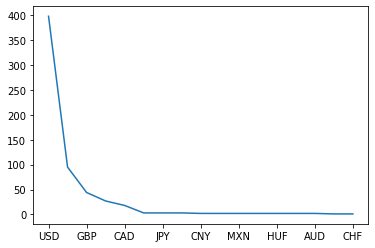

In [89]:
print(data['salary_currency'].unique())
print(data['salary_currency'].nunique())
print(data['salary_currency'].value_counts())
print(data['salary_currency'].value_counts().plot(kind='line'))

Maximum currency is USD based currency

607
[ 79833 260000 109024  20000 150000  72000 190000  35735 135000 125000
  51321  40481  39916  87000  85000   8000  41689 114047   5707  56000
  43331   6072  47899  98000 115000 325000  42000  33511 100000 117104
  59303  70000  68428 450000  46759  74130 103000 250000  10000 138000
  45760  50180 106000 112872  15966  76958 188000 105000  70139  91000
  45896  54742  60000 148261  38776 118000 120000 138350 110000 130800
  21669 412000  45618  62726  49268 190200  91237  42197  82528 235000
  53192   5409 270000  80000  79197 140000  54238  47282 153667  28476
  59102 170000  88654  76833  19609 276000  29751  89294  12000  95746
  75000  36259  62000  73000  51519 187442  30428  94564 113476 103160
  45391 225000  50000  40189  90000 200000 110037  10354 151000   9466
  40570  49646  38400  24000  63711  77364 220000 240000  82500  82744
  62649 153000 160000 168000  75774  13400 144000 127221 119059 423000
 230000  28369  63831 130026 165000  55000  60757 174000   2859  40038
  

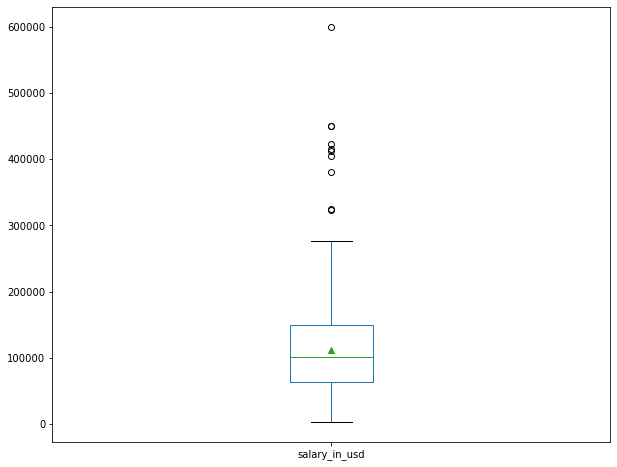

In [90]:
print(data['salary_in_usd'].count())
print(data['salary_in_usd'].unique())
print(data['salary_in_usd'].max())
print(data['salary_in_usd'].min())
print(data['salary_in_usd'].mean())
print(data['salary_in_usd'].plot(kind='box',showmeans=True, figsize=(10,8)))

The maximum and minimum salary given to employees are 600000 and 2859, resepectively
in USD currency. The mean of salary of all professional employees is 112298 approx. The salary over the 300000 are consider as outliers.

['DE' 'JP' 'GB' 'HN' 'US' 'HU' 'NZ' 'FR' 'IN' 'PK' 'PL' 'PT' 'CN' 'GR'
 'AE' 'NL' 'MX' 'CA' 'AT' 'NG' 'PH' 'ES' 'DK' 'RU' 'IT' 'HR' 'BG' 'SG'
 'BR' 'IQ' 'VN' 'BE' 'UA' 'MT' 'CL' 'RO' 'IR' 'CO' 'MD' 'KE' 'SI' 'HK'
 'TR' 'RS' 'PR' 'LU' 'JE' 'CZ' 'AR' 'DZ' 'TN' 'MY' 'EE' 'AU' 'BO' 'IE'
 'CH']
57
AxesSubplot(0.125,0.125;0.775x0.755)


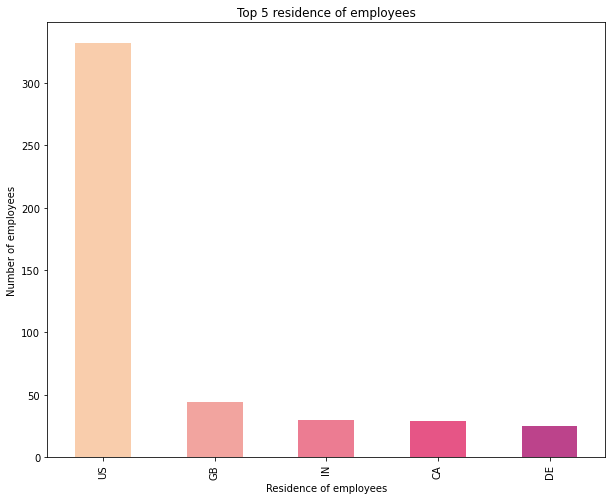

In [92]:
print(data['employee_residence'].unique())
print(data['employee_residence'].nunique())
print(data['employee_residence'].value_counts()[:5].plot(kind='bar',xlabel='Residence of employees', ylabel='Number of employees', title='Top 5 residence of employees', 
figsize=(10,8), color=["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b","#933291"]))